In [1]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace
import sklearn
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
# installing openpyxl library to allow Pandas to read .xlsx files
#!pip install openpyxl

In [3]:
#Loading the Data
vehicleData = pd.read_excel('formattedData.xlsx')
vehicleDataFeatures = vehicleData.columns
print(vehicleDataFeatures)

# converting the engine column to numeric
vehicleData["Engine"] = pd.to_numeric(vehicleData["Engine"], errors="coerce")

# encoding drivetrain and transmission to be considered a feature
vehicleData["DrivetrainEncoded"] = LabelEncoder().fit_transform(vehicleData["Drivetrain"])  # '2WD': 0,   4WD': 1,   '4x4': 2,  'AWD': 3,  'FWD': 4
vehicleData["TransmissionEncoded"] = LabelEncoder().fit_transform(vehicleData["Transmission"])  #'Automatic': 16, '6 Speed Automatic': 7, '9 Speed Automatic': 15, '10 Speed Automatic': 1, '8 Speed Automatic': 13, '7 Speed Automatic with auto-shift': 11, '1 Speed Automatic': 0, 'Manual': 19, 'CVT': 17, '4 Speed Automatic': 2, '6 Speed Manual': 9, '8 Speed Automatic with auto-shift': 14, '6 Speed Automatic with auto-shift': 8, '5 Speed Manual': 6, '5 Speed Automatic': 4, '7 Speed Automatic': 10, 'Sequential': 20, '5 Speed Automatic with auto-shift': 5, '7 Speed Manual': 12, '4 Speed Manual': 3, 'F1 Transmission': 18


Index(['Year', 'Make', 'Model', 'Kilometres', 'Body_Type', 'Engine',
       'Transmission', 'Drivetrain', 'Exterior_Colour', 'Interior_Colour',
       'Passengers', 'Doors', 'Fuel_Type', 'City', 'Highway', 'Price'],
      dtype='object')


In [4]:
# display the DataFrame
display(vehicleData)

,Year,Make,Model,Kilometres,Body_Type,Engine,Transmission,Drivetrain,Exterior_Colour,Interior_Colour,Passengers,Doors,Fuel_Type,City,Highway,Price,DrivetrainEncoded,TransmissionEncoded
0,2014,Acura,RDX,290000,SUV,4.0,Automatic,AWD,Black,Black,5,5,Gas,11.336434,8.668992,11600,3,16
1,2014,Acura,RDX,158868,SUV,6.0,6 Speed Automatic,AWD,Silver,Black,5,5,Gas,10.700000,7.300000,17998,3,7
2,2016,Acura,MDX,226214,SUV,6.0,Automatic,AWD,White,Black,7,5,Gas,12.700000,9.100000,17999,3,16
3,2019,Acura,MDX,42081,SUV,6.0,9 Speed Automatic,AWD,White Diamond Pearl,Black,5,5,Gas,12.200000,9.000000,40588,3,15
4,2021,Acura,RDX,66960,SUV,4.0,10 Speed Automatic,AWD,Majestic Black Pearl,Black,5,5,Gas,11.000000,8.600000,41599,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18642,2016,Volvo,XC90,145898,SUV,4.0,Automatic,AWD,Black,Brown,7,4,Gas,11.500000,9.500000,27998,3,16
18643,2015,Volvo,XC60,134000,SUV,4.0,Automatic,AWD,Black Stone,Black,5,4,Gas,13.000000,9.400000,18995,3,16
18644,2017,Volvo,XC90,67596,SUV,4.0,Automatic,AWD,White,Black,7,4,Gas,11.500000,9.600000,37990,3,16
18645,2018,Volvo,S90,74143,Sedan,4.0,Automatic,AWD,Onyx Black Metallic,Black,5,4,Gas,10.600000,7.600000,37980,3,16


In [5]:
statSummary = vehicleData.describe()
# display the statistical summary for each numerical feature
display(statSummary)

,Year,Kilometres,Engine,Passengers,Doors,City,Highway,Price,DrivetrainEncoded,TransmissionEncoded
count,18647.000000,18647.000000,18316.000000,18647.000000,18647.000000,18647.000000,18647.000000,1.864700e+04,18647.000000,18647.000000
mean,2018.713466,65777.058454,4.957633,5.132139,3.737330,11.208847,8.401843,4.745054e+04,3.156111,13.985735
std,4.003967,63845.702800,1.335852,0.947128,0.731284,2.930360,2.094096,5.337145e+04,0.906274,3.828263
min,1958.000000,0.000000,3.000000,2.000000,2.000000,0.000000,0.000000,2.000000e+03,0.000000,0.000000
25%,2017.000000,6779.000000,4.000000,5.000000,4.000000,9.300000,7.200000,2.488000e+04,3.000000,13.000000
50%,2019.000000,52600.000000,4.000000,5.000000,4.000000,11.200000,8.414118,3.699500e+04,3.000000,16.000000
75%,2022.000000,102501.000000,6.000000,5.000000,4.000000,12.900000,9.600000,5.797750e+04,4.000000,16.000000
max,2023.000000,480000.000000,8.000000,15.000000,5.000000,39.200000,42.800000,1.699998e+06,5.000000,20.000000


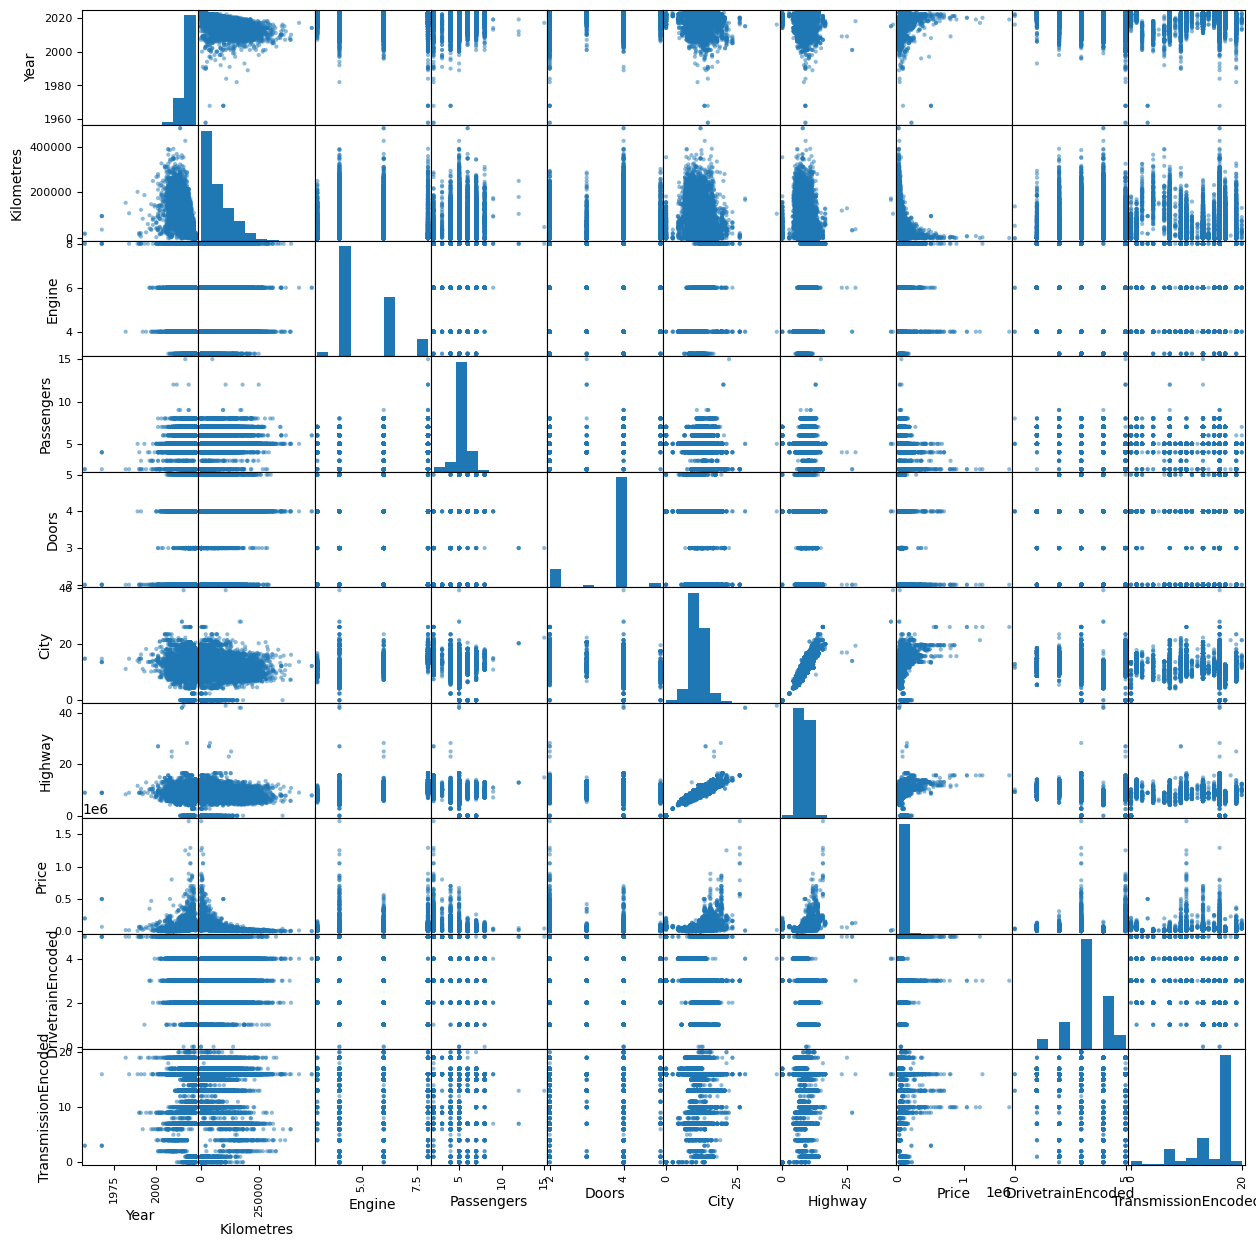

In [6]:
# distribution of each feature campared with every feature
pd.plotting.scatter_matrix(vehicleData, figsize=(15,15))
plt.show()

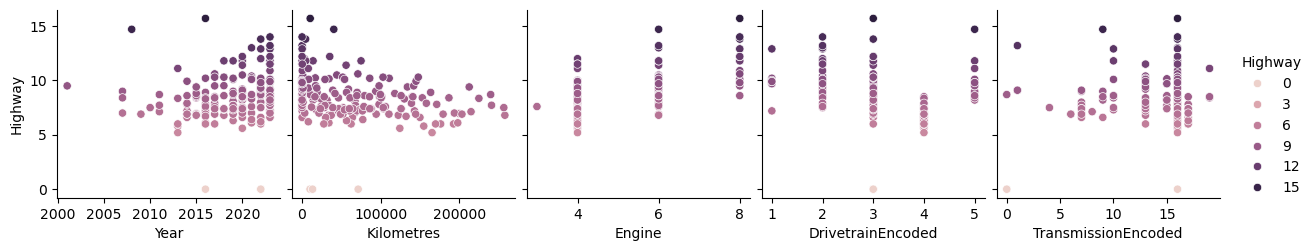

In [7]:
# Random subset of the data
randomly = np.random.RandomState(0)
indices = randomly.choice(np.arange(len(vehicleData)), size=200, replace=False)

# Comparison  of features against the target of Highway MPG
sn.pairplot(
    data = vehicleData.iloc[indices],
    x_vars= vehicleData[["Year", "Kilometres", "Engine", "DrivetrainEncoded", "TransmissionEncoded"]],
    y_vars= ["Highway"],
    hue= "Highway"
)
plt.show()

In [8]:
# Seperating the data to training and testing sets
def getTrainingAndTestingData( X: np.ndarray, Y: np.ndarray):
    ''' Randomly seperate the data to two sets
    Args:
        X: data in 2D matrix form 
        Y: labels in vector form
    '''
    X_trn, X_tst, y_trn, y_tst = train_test_split(X,Y,test_size=0.4, random_state=42)
    return X_trn, X_tst, y_trn, y_tst
    

In [9]:
# Function for adding a bias term
def addBiasTerm(inputFeatures : np.ndarray) -> np.ndarray:
    ''' Bias term added to input feature
    Args:
        inputFeatures: features from the input data as a matrix
    Return:
        A matric with the bias in the first column
    '''
    bias = np.ones((inputFeatures.shape[0],1))
    result = np.hstack((bias,inputFeatures))
    return result
    

In [10]:
# Function to call the data splitting and adding the bias term
def getPreparedData() -> Tuple[np.ndarray]:
    ''' Preparing the data by splitting it to two sets and adding a bias term
    Return:
        Tuple of NumPy arrays with the first element of training data and target, and the second containing testing data and target
    '''
    # cleaning data from rows with NaNs 
    cleanerVehicleData = vehicleData.dropna(subset=["Year", "Kilometres", "Engine", "DrivetrainEncoded", "TransmissionEncoded", "Highway"])
    
    X = cleanerVehicleData[["Year", "Kilometres", "Engine", "DrivetrainEncoded", "TransmissionEncoded"]].to_numpy()
    Y = cleanerVehicleData["Highway"].to_numpy()
    
    X_trn, X_tst, y_trn, y_tst = getTrainingAndTestingData(X,Y)
    X_trn = addBiasTerm(X_trn)
    X_tst = addBiasTerm(X_tst)
    
    return X_trn, y_trn, X_tst, y_tst
    

In [11]:
# Sum of Squared Error
def SumSquaredError(Y: np.ndarray, YHat: np.ndarray) -> float:
    ''' Computing the Root Means of Squared Error
    Args:
        Y: targets in 1D vector form
        Y: predicted targets in 1D vector form
    Return:
        float of formula computation 
    '''
    Y = Y.reshape(-1,)
    YHat = YHat.reshape(-1,)
    result = np.sum((YHat-Y) **2)
    return result
    

In [12]:
# Mean of Squared Error
def MeanSquaredError(Y: np.ndarray, YHat: np.ndarray) -> float:
    ''' Computing the Root Means of Squared Error
    Args:
        Y: targets in 1D vector form
        Y: predicted targets in 1D vector form
    Return:
        float of formula computation 
    '''
    Y = Y.reshape(-1,)
    YHat = YHat.reshape(-1,)
    result = np.mean((YHat-Y) **2)
    return result
    

In [13]:
# Root Means of Squared Error
def RootMeanSquaredError(Y: np.ndarray, YHat: np.ndarray) -> float:
    ''' Computing the Root Means of Squared Error
    Args:
        Y: targets in 1D vector form
        Y: predicted targets in 1D vector form
    Return:
        float of formula computation 
    '''
    Y = Y.reshape(-1,)
    YHat = YHat.reshape(-1,)
    result = np.sqrt(MeanSquaredError(Y,YHat))
    return result
    

In [14]:
# Applying Least Squares to the data
class OrdinaryLeastSquares():
    def __init__(self):
        self.w = None
        
    def train(self, X:np.ndarray, Y: np.ndarray) -> object:
        self.w = np.linalg.pinv(X.T @ X) @ X.T @ Y
        return self
        
    def prediction(self,  X:np.ndarray) -> np.ndarray:
        result = X @ self.w
        return result
        

In [15]:
# Data is prepared
X_trn, y_trn, X_tst, y_tst = getPreparedData()

# OrdinaryLeastSquares Object is created
ordinaryLeastSquares = OrdinaryLeastSquares()

# ordinaryLeastSquares is trained
ordinaryLeastSquares.train(X_trn, y_trn)

# ordinaryLeastSquares prediction is computed
y_tstHat = ordinaryLeastSquares.prediction(X_tst)

In [16]:
# Computing Sum of Squared Error of the test
testSSE = SumSquaredError(y_tst, y_tstHat)

# Computing Mean of Squared Error of the test
testMSE = MeanSquaredError(y_tst, y_tstHat)

# Computing Root Means of Squared Error of the test
testRMSE = RootMeanSquaredError(y_tst, y_tstHat)

print(f" Test target Sum of Squared Error: {testSSE}")
print(f" Test target Mean of Squared Error: {testMSE}")
print(f" Test target Root Mean of Squared Error: {testRMSE}")

 Test target Sum of Squared Error: 12470.519279736407
 Test target Mean of Squared Error: 1.7019952613261098
 Test target Root Mean of Squared Error: 1.3046054044522848


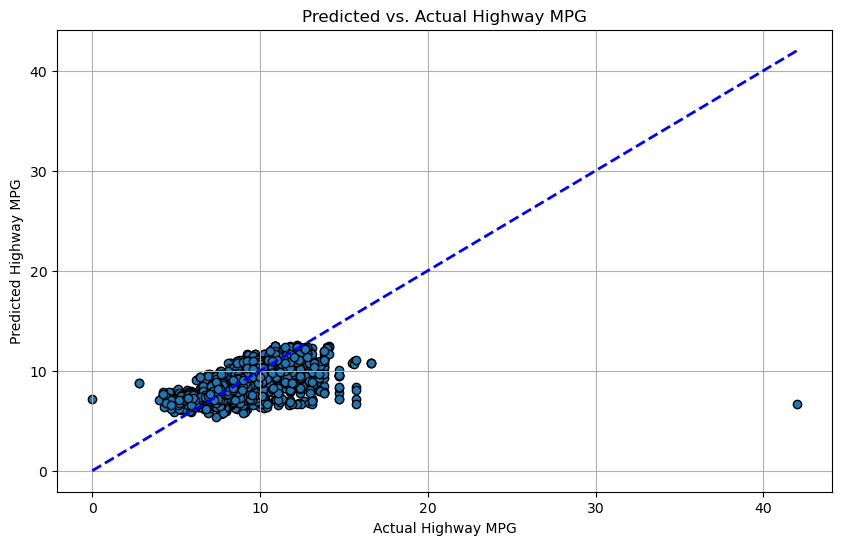

In [26]:
# Plotting the Predicted and Actual values after running the model
xAxisRange = [y_tst.min(), y_tst.max()]
yAxisRange = [y_tst.min(), y_tst.max()]

plt.figure(figsize=(10,6))
plt.scatter(y_tst, y_tstHat, edgecolors='k')
plt.plot(xAxisRange, yAxisRange, 'b--', linewidth=2)

plt.xlabel("Actual Highway MPG")
plt.ylabel("Predicted Highway MPG")
plt.title("Predicted vs. Actual Highway MPG")
plt.grid(True)
plt.show()